In [13]:
#Import standard python modules
import os.path
import sys

#Determine local directory path:
local_path = os.path.abspath('') # os.path.dirname(os.path.abspath(__file__))
print(f"Local path appears to be {local_path}")

#set path to ADF lib:
lib_path = os.path.join(local_path,"lib")
print(f"Lib path appears to be {lib_path}")

#set path to ADF plotting scripts directory:
plotting_scripts_path = os.path.join(local_path, "scripts", "plotting")
print(plotting_scripts_path)


Local path appears to be /Users/brianpm/Code/scratch/CAM_diagnostics
Lib path appears to be /Users/brianpm/Code/scratch/CAM_diagnostics/lib
/Users/brianpm/Code/scratch/CAM_diagnostics/scripts/plotting


In [14]:

#Add paths to python path:
sys.path.append(lib_path)
sys.path.append(plotting_scripts_path)

#Import ADF diagnostics object:
from adf_diag import AdfDiag


In [15]:

#Set path to config YAML file:
config_fil = "/Users/brianpm/Code/scratch/CAM_diagnostics/config_user_module_example.yaml"

#Initialize ADF object:
adf = AdfDiag(config_fil)

In [16]:
basic_info_dict = adf.read_config_var("diag_basic_info")
basic_info_dict

{'compare_obs': False,
 'create_html': False,
 'obs_climo_loc': '/glade/work/brianpm/observations/climo_files',
 'cam_regrid_loc': '/Volumes/Samsung_T5',
 'cam_overwrite_regrid': False,
 'cam_diag_plot_loc': '/Users/brianpm/Desktop/'}

In [17]:
baseline_dict = adf.read_config_var("diag_cam_baseline_climo")
baseline_dict


{'calc_cam_climo': True,
 'cam_overwrite_climo': False,
 'cam_case_name': 'b.e15.B5505C5WCCML45BGC.cam5_4.1980_2010.002',
 'cam_hist_loc': '/Volumes/Samsung_T5',
 'cam_climo_loc': '/Volumes/Samsung_T5',
 'start_year': 2000,
 'end_year': 2010,
 'cam_ts_done': False,
 'cam_ts_save': True,
 'cam_overwrite_ts': False,
 'cam_ts_loc': '/Volumes/Samsung_T5'}

In [18]:
from pathlib import Path
list(Path(baseline_dict['cam_ts_loc']).glob(baseline_dict['cam_case_name']+"*"))

[PosixPath('/Volumes/Samsung_T5/b.e15.B5505C5WCCML45BGC.cam5_4.1980_2010.002.cam.h0.U.200002-201001.nc')]

/Users/brianpm/Code/scratch/CAM_diagnostics/scripts/plotting/marshian_zonal_plot.py:188: UserWarning: Input file list is empty.
  warnings.warn(f"Input file list is empty.")


<xarray.DataArray 'U' (time: 12, lev: 70, lat: 192)>
dask.array<stack, shape=(12, 70, 192), dtype=float32, chunksize=(1, 70, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12


/Users/brianpm/Code/scratch/CAM_diagnostics/scripts/plotting/marshian_zonal_plot.py:188: UserWarning: Input file list is empty.
  warnings.warn(f"Input file list is empty.")


KeyError: 'T'

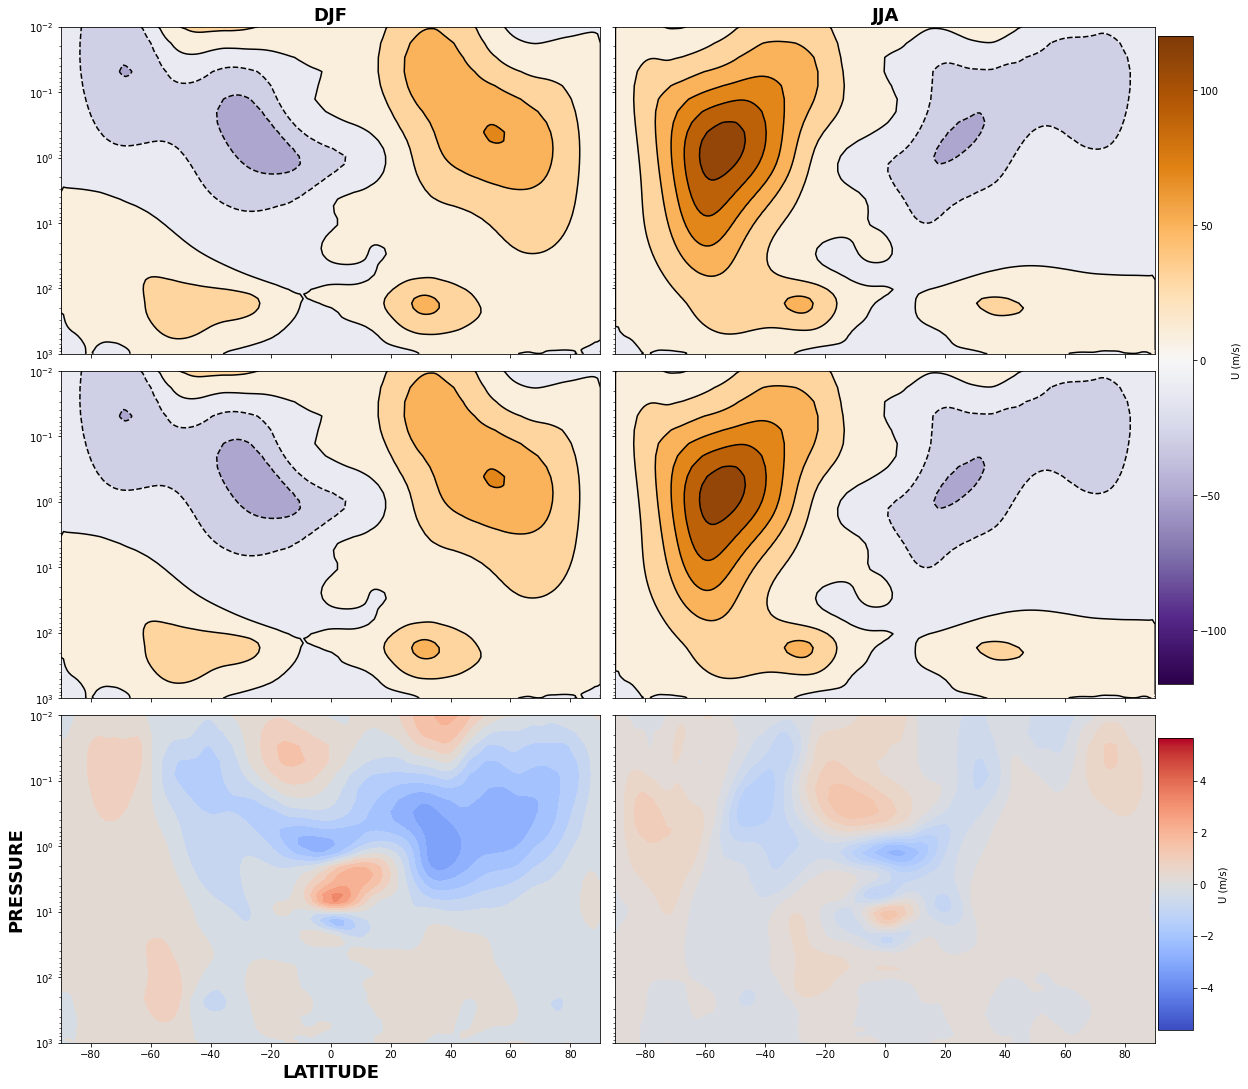

In [39]:
# # if you are making changes, need to make sure to RELOAD
import importlib
import marshian_zonal_plot as mzp
importlib.reload(mzp)

#Run test_script:
mzp.marshian_zonal_plot(adf)